In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('flights_sample_3m.csv')

# Print all column names to check for correct casing/spelling
print("Column names:", df.columns.tolist())

# Preview the data
print("\nTop 5 rows:")
print(df.head())

# Check the unique airports
print("\nUnique airports in 'Origin':")
print(df['ORIGIN'].value_counts().head(10))  # <- likely needs to be uppercase


Column names: ['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

Top 5 rows:
      FL_DATE                AIRLINE                AIRLINE_DOT AIRLINE_CODE  \
0  2019-01-09  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
1  2022-11-19   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
2  2022-07-22  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
3  2023-03-06   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
4  2020-02-23       Spirit Air Lines       Spirit Air Lines: NK           NK   

   DOT_CODE  FL_NUMBE

In [3]:
# Get the top 10 airports by flight count
top_10_airports = df['ORIGIN'].value_counts().head(10).index.tolist()

# Add SEA if it’s not already included
if 'SEA' not in top_10_airports:
    top_10_airports.append('SEA')

# Filter the DataFrame
filtered_df = df[df['ORIGIN'].isin(top_10_airports)]

# Preview the result
filtered_df.head()


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",...,0.0,210.0,220.0,198.0,1533.0,NaN,NaN,NaN,NaN,NaN
10,2021-06-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2820,ATL,"Atlanta, GA",BDL,"Hartford, CT",...,0.0,142.0,133.0,115.0,859.0,60.0,0.0,0.0,0.0,0.0
18,2019-03-24,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,906,DEN,"Denver, CO",IAH,"Houston, TX",...,0.0,148.0,139.0,110.0,862.0,NaN,NaN,NaN,NaN,NaN


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


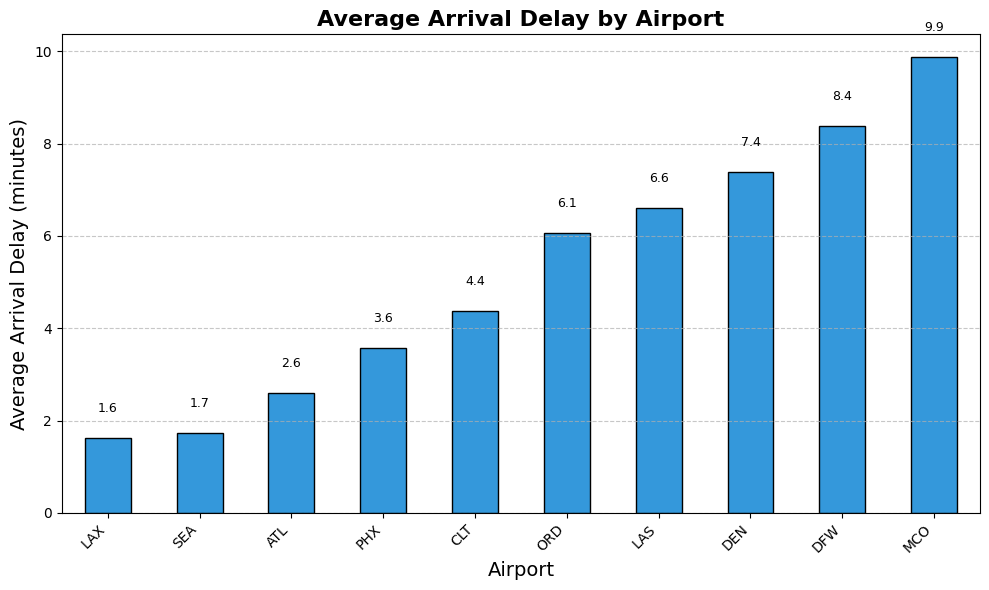

In [7]:
# Average arrival delay
import matplotlib.pyplot as plt

avg_arrival_delay = filtered_df.groupby('ORIGIN')['ARR_DELAY'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_arrival_delay.plot(kind='bar', color='#3498db', edgecolor='black')

plt.title('Average Arrival Delay by Airport', fontsize=16, fontweight='bold')
plt.xlabel('Airport', fontsize=14)
plt.ylabel('Average Arrival Delay (minutes)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(avg_arrival_delay):
    plt.text(i, value + 0.5, f"{value:.1f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('average_arrival_delay.png', dpi=300)
plt.show()


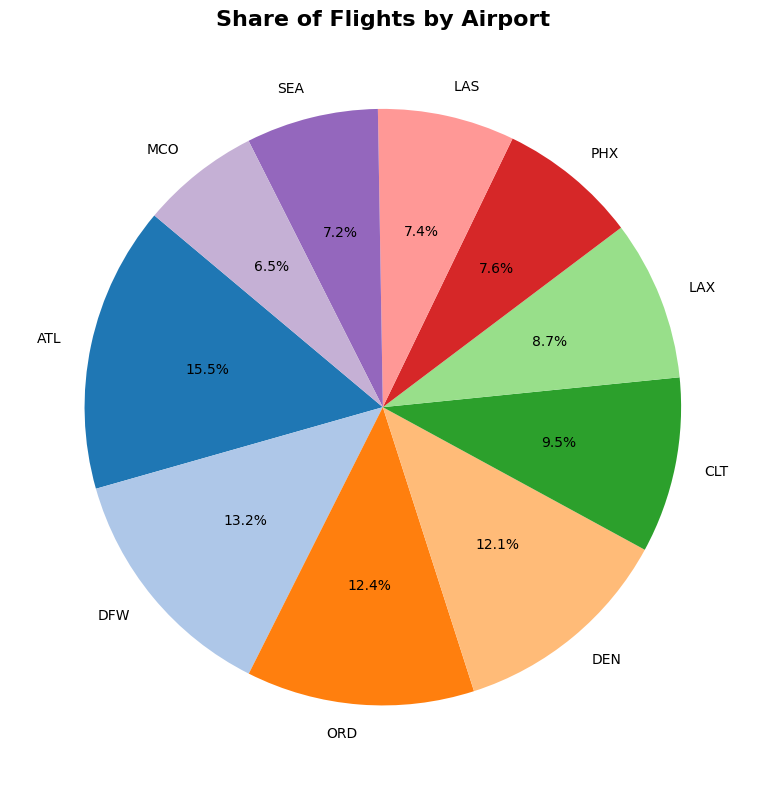

In [8]:
# Share of flights
flight_share = filtered_df['ORIGIN'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
flight_share.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

plt.title('Share of Flights by Airport', fontsize=16, fontweight='bold')
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.savefig('share_of_flights.png', dpi=300)
plt.show()


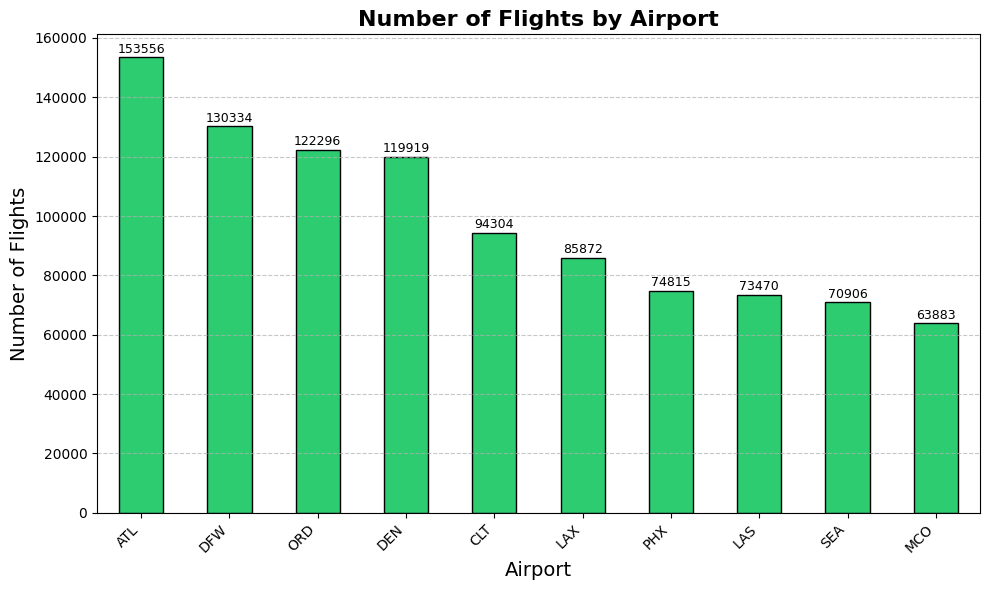

In [9]:
# Number of flights
flight_counts = filtered_df['ORIGIN'].value_counts()

plt.figure(figsize=(10, 6))
flight_counts.plot(kind='bar', color='#2ecc71', edgecolor='black')

plt.title('Number of Flights by Airport', fontsize=16, fontweight='bold')
plt.xlabel('Airport', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(flight_counts):
    plt.text(i, value + 500, f"{value}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('number_of_flights.png', dpi=300)
plt.show()


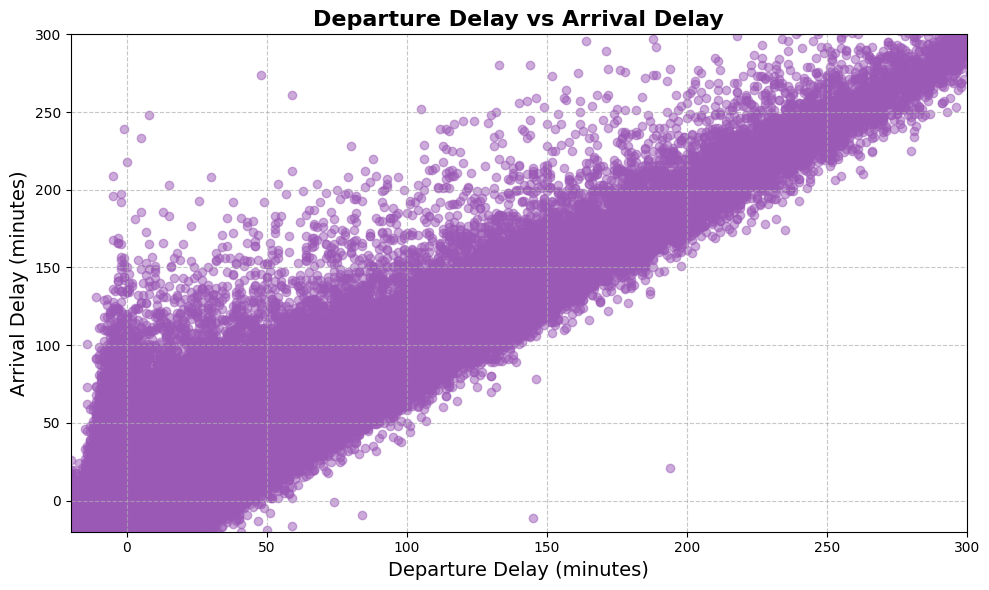

In [10]:
# Scatter plot: departure vs arrival delay
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['DEP_DELAY'], filtered_df['ARR_DELAY'], alpha=0.5, color='#9b59b6')

plt.title('Departure Delay vs Arrival Delay', fontsize=16, fontweight='bold')
plt.xlabel('Departure Delay (minutes)', fontsize=14)
plt.ylabel('Arrival Delay (minutes)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlim(-20, 300)
plt.ylim(-20, 300)

plt.tight_layout()
plt.savefig('dep_vs_arr_delay.png', dpi=300)
plt.show()


C:\Users\tonyd\AppData\Local\Temp\ipykernel_14528\3937363703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['FL_DATE'] = pd.to_datetime(filtered_df['FL_DATE'])
C:\Users\tonyd\AppData\Local\Temp\ipykernel_14528\3937363703.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_flights = filtered_df.resample('M', on='FL_DATE').size()


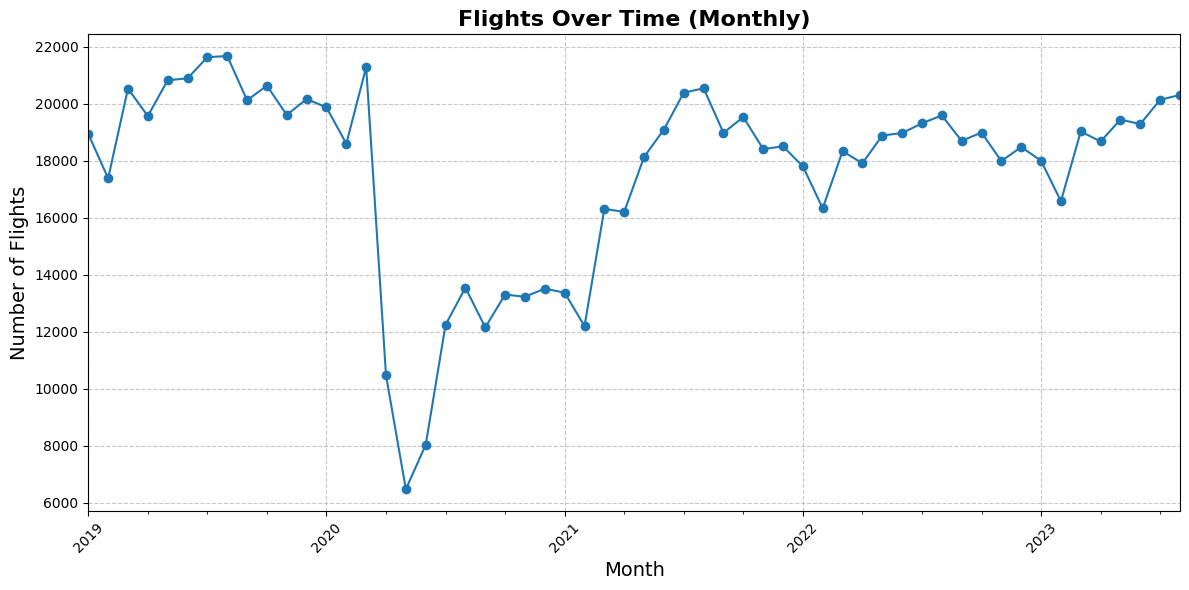

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure FL_DATE is a datetime
filtered_df['FL_DATE'] = pd.to_datetime(filtered_df['FL_DATE'])

# Group flights by month
monthly_flights = filtered_df.resample('M', on='FL_DATE').size()

# Plot
plt.figure(figsize=(12, 6))
monthly_flights.plot(kind='line', marker='o', linestyle='-')
plt.title('Flights Over Time (Monthly)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('charts/flights_over_time.png', dpi=300)
plt.show()


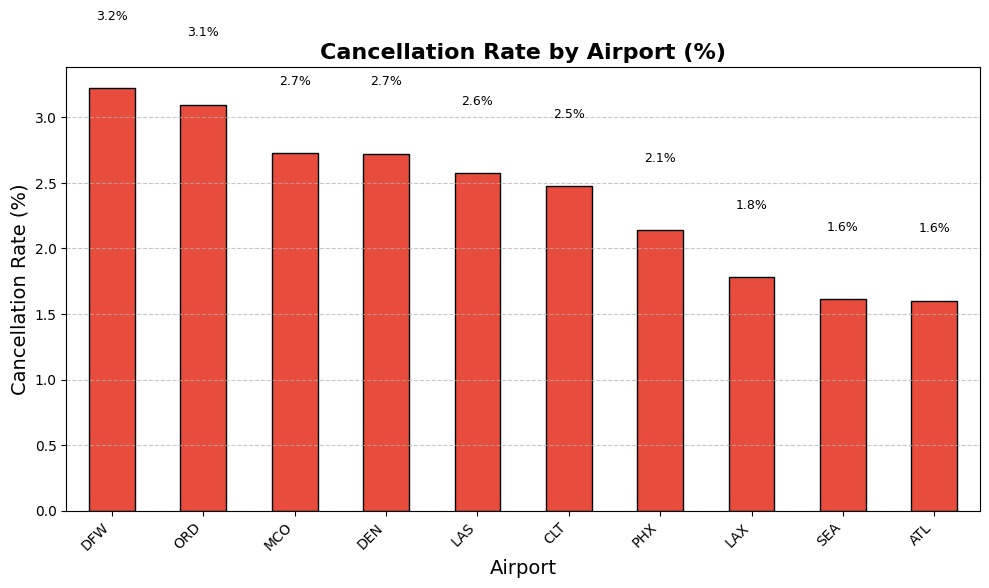

In [12]:
# Calculate cancellation rate (%)
cancellation_rate = (filtered_df.groupby('ORIGIN')['CANCELLED'].mean() * 100).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
cancellation_rate.plot(kind='bar', color='#e74c3c', edgecolor='black')
plt.title('Cancellation Rate by Airport (%)', fontsize=16, fontweight='bold')
plt.xlabel('Airport', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for i, value in enumerate(cancellation_rate):
    plt.text(i, value + 0.5, f"{value:.1f}%", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('charts/cancellation_rate_by_airport.png', dpi=300)
plt.show()
